In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/sales_performance_dataset - sales_performance_dataset.csv')

In [5]:
df.tail()

,Transaction_ID,Date,Region,Employee_ID,Employee_Name,Product_Category,Product_Subcategory,Product_Price,Units_Sold,Discount_Applied,Employee_Performance_Score,Return_Status,Revenue
495,496,2024-10-30,East,119,Dana Henderson,Clothing,Laptops,983,1,25,6,No,737.25
496,497,2024-10-28,East,113,Amanda Lane,Appliances,T-Shirts,392,2,25,6,No,588.00
497,498,2024-07-20,West,112,Ronald Hernandez,Electronics,Washing Machines,583,4,0,10,No,2332.00
498,499,2024-02-12,North,105,Patrick Garcia,Clothing,Smartphones,513,1,5,5,No,487.35
499,500,2024-05-05,West,106,Jonathan Knapp,Appliances,Washing Machines,558,9,0,5,No,5022.00


In [6]:
df.head()

,Transaction_ID,Date,Region,Employee_ID,Employee_Name,Product_Category,Product_Subcategory,Product_Price,Units_Sold,Discount_Applied,Employee_Performance_Score,Return_Status,Revenue
0,1,2024-10-09,East,101,Anthony Wilson,Clothing,Smartphones,293,3,15,6,No,747.15
1,2,2024-06-09,West,103,Anne Ho,Clothing,Tables,339,8,25,10,No,2034.00
2,3,2024-04-09,North,118,Katelyn Parker,Appliances,Laptops,357,4,20,8,No,1142.40
3,4,2024-04-11,East,110,Adam Watkins,Furniture,Smartphones,385,2,0,3,No,770.00
4,5,2024-11-17,East,103,Rebecca Johnson,Appliances,Washing Machines,514,2,0,10,No,1028.00


In [7]:
len(df)

500

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
numeric_cols = ['Transaction_ID', 'Employee_ID', 'Product_Price', 'Units_Sold', 'Discount_Applied',
                'Employee_Performance_Score', 'Revenue']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [10]:
#Calculating total revenue across regions
total_revenue = df['Revenue'].sum()
print(f'Total revenue across different region is ${total_revenue}')

Total revenue across different region is $1141055.5


In [11]:
region_revenue = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
print(f"Top 5 region according to revenue is ")
print(region_revenue)

Top 5 region according to revenue is 
Region
North    310284.25
West     304749.60
South    269520.00
East     256501.65
Name: Revenue, dtype: float64


<ipython-input-12-aed812f14374>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='Region', data=region_revenue, palette='viridis')


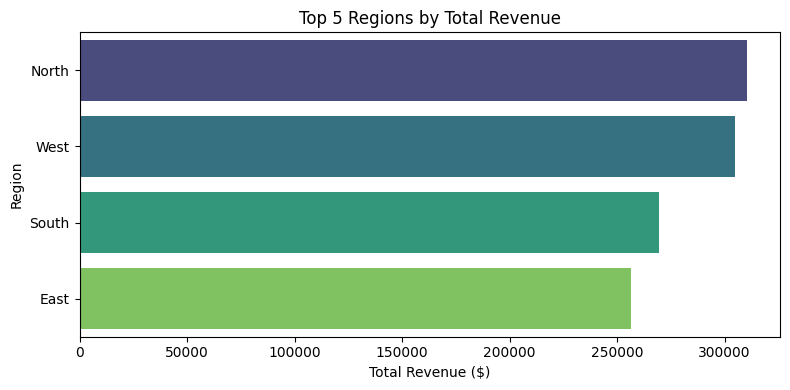

In [12]:
region_revenue = df.groupby('Region')['Revenue'].sum().reset_index()
region_revenue = region_revenue.sort_values('Revenue', ascending=False).head(5)

# Verify DataFrame structure


# Generate visualization
plt.figure(figsize=(8, 4))
sns.barplot(x='Revenue', y='Region', data=region_revenue, palette='viridis')
plt.title('Top 5 Regions by Total Revenue')
plt.xlabel('Total Revenue ($)'); plt.ylabel('Region')
plt.tight_layout()
plt.show()

In [13]:
avg_revenue_per_region = df.groupby("Region")["Revenue"].mean().sort_values(ascending=False)
top_avg_revenue_region = avg_revenue_per_region.idxmax()
print(f"Region with the Highest Average Revenue per Transaction: {top_avg_revenue_region}")


Region with the Highest Average Revenue per Transaction: North


In [15]:
# Calculate average revenue per region
avg_revenue_per_region = df.groupby("Region")["Revenue"].mean().reset_index()
avg_revenue_per_region = avg_revenue_per_region.sort_values(by="Revenue", ascending=False)

In [16]:
top_avg_revenue_region = avg_revenue_per_region.iloc[0]["Region"]

<ipython-input-17-dc2513fc0d67>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='Revenue', ylabel='Region'>

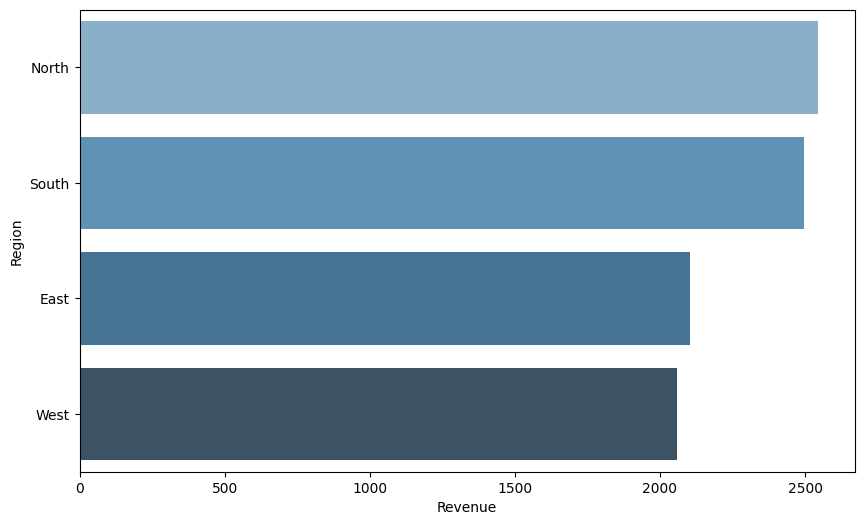

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Revenue",
    y="Region",
    data=avg_revenue_per_region,
    palette="Blues_d",
    saturation=0.7
)


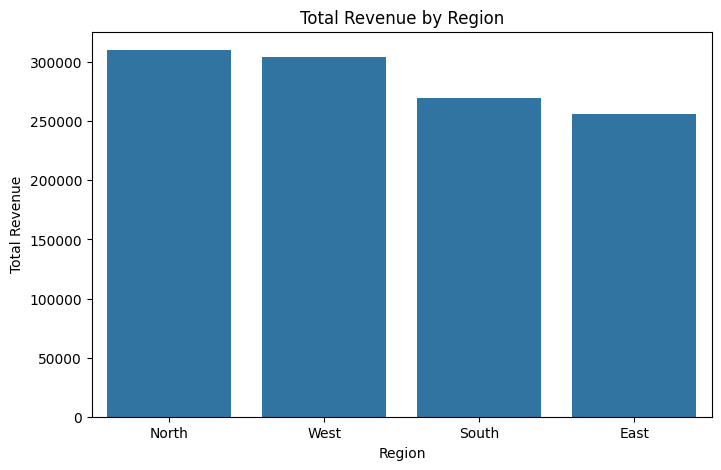

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

regional_revenue = df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=regional_revenue.index, y=regional_revenue.values)
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()

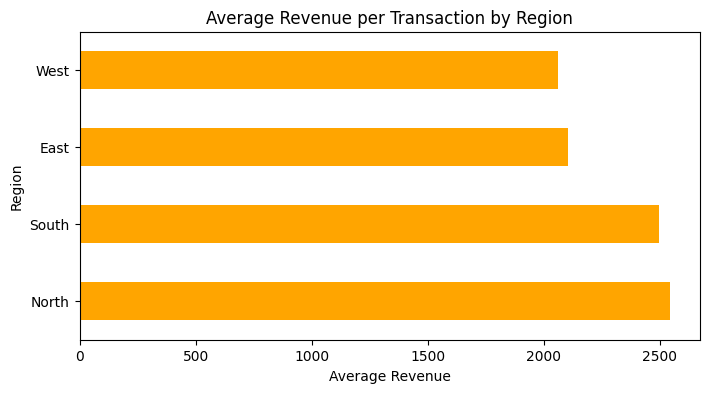

In [25]:
avg_revenue = df.groupby('Region')['Revenue'].mean().sort_values(ascending=False)
avg_revenue.plot(kind='barh', figsize=(8, 4), color='orange')
plt.title('Average Revenue per Transaction by Region')
plt.xlabel('Average Revenue')
plt.ylabel('Region')
plt.show()


In [26]:
discount_revenue_correlation = df["Discount_Applied"].corr(df["Revenue"])
print(f"Correlation between Discount and Revenue: {discount_revenue_correlation}")


Correlation between Discount and Revenue: -0.043495612101320906


In [27]:
discount_impact = df.groupby("Discount_Applied")["Revenue"].mean()
print("Average Revenue by Discount Percentage:\n", discount_impact)


Average Revenue by Discount Percentage:
 Discount_Applied
0     2411.139535
5     2461.050725
10    2273.400000
15    2103.220918
20    2303.848649
25    2207.315934
Name: Revenue, dtype: float64


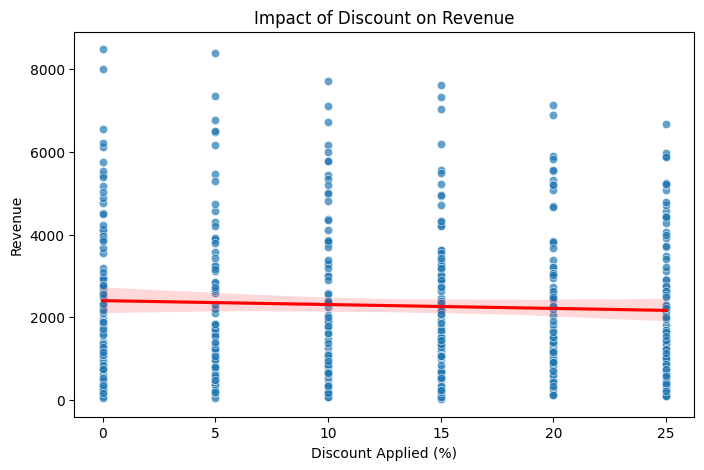

In [28]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Discount_Applied', y='Revenue', alpha=0.7)
sns.regplot(data=df, x='Discount_Applied', y='Revenue', scatter=False, color='red')
plt.title('Impact of Discount on Revenue')
plt.xlabel('Discount Applied (%)')
plt.ylabel('Revenue')
plt.show()


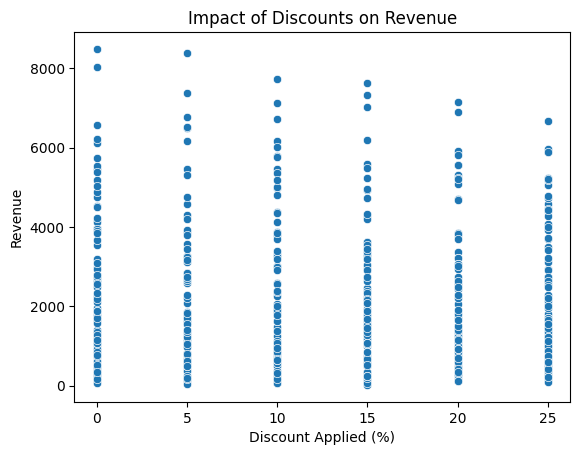

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x="Discount_Applied", y="Revenue")
plt.title("Impact of Discounts on Revenue")
plt.xlabel("Discount Applied (%)")
plt.ylabel("Revenue")
plt.show()


In [29]:
discount_bins = [0, 5, 10, 15, 20, 25]
discount_labels = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%']
df['Discount_Range'] = pd.cut(df['Discount_Applied'], bins=discount_bins, labels=discount_labels, include_lowest=True, right=False)
discount_impact = df.groupby('Discount_Range').agg({'Revenue': 'sum', 'Units_Sold': 'sum'}).reset_index()

corr_discount_units = df['Discount_Applied'].corr(df['Units_Sold'], method='spearman')

<ipython-input-29-0d23c2c8b06c>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_impact = df.groupby('Discount_Range').agg({'Revenue': 'sum', 'Units_Sold': 'sum'}).reset_index()


In [30]:
df.head()

,Transaction_ID,Date,Region,Employee_ID,Employee_Name,Product_Category,Product_Subcategory,Product_Price,Units_Sold,Discount_Applied,Employee_Performance_Score,Return_Status,Revenue,Discount_Range
0,1,2024-10-09,East,101,Anthony Wilson,Clothing,Smartphones,293,3,15,6,No,747.15,15-20%
1,2,2024-06-09,West,103,Anne Ho,Clothing,Tables,339,8,25,10,No,2034.00,NaN
2,3,2024-04-09,North,118,Katelyn Parker,Appliances,Laptops,357,4,20,8,No,1142.40,20-25%
3,4,2024-04-11,East,110,Adam Watkins,Furniture,Smartphones,385,2,0,3,No,770.00,0-5%
4,5,2024-11-17,East,103,Rebecca Johnson,Appliances,Washing Machines,514,2,0,10,No,1028.00,0-5%


In [31]:
df.isna().sum()

,0
Transaction_ID,0
Date,0
Region,0
Employee_ID,0
Employee_Name,0
Product_Category,0
Product_Subcategory,0
Product_Price,0
Units_Sold,0
Discount_Applied,0


In [32]:
discount_summary = df.groupby('Discount_Applied').agg({
    'Revenue': ['sum', 'mean'],
    'Units_Sold': ['sum', 'mean']
})

print("Discount Impact Analysis:")
print(discount_summary)

# Correlation between discount and revenue
discount_revenue_correlation = df['Discount_Applied'].corr(df['Revenue'])
print(f"Correlation between Discount Percentage and Revenue: {discount_revenue_correlation:.2f}")

Discount Impact Analysis:
                    Revenue              Units_Sold          
                        sum         mean        sum      mean
Discount_Applied                                             
0                 207358.00  2411.139535        426  4.953488
5                 169812.50  2461.050725        324  4.695652
10                186418.80  2273.400000        413  5.036585
15                206115.65  2103.220918        436  4.448980
20                170484.80  2303.848649        421  5.689189
25                200865.75  2207.315934        477  5.241758
Correlation between Discount Percentage and Revenue: -0.04


In [33]:
discount_summary

Revenue              Units_Sold          
                        sum         mean        sum      mean
Discount_Applied                                             
0                 207358.00  2411.139535        426  4.953488
5                 169812.50  2461.050725        324  4.695652
10                186418.80  2273.400000        413  5.036585
15                206115.65  2103.220918        436  4.448980
20                170484.80  2303.848649        421  5.689189
25                200865.75  2207.315934        477  5.241758

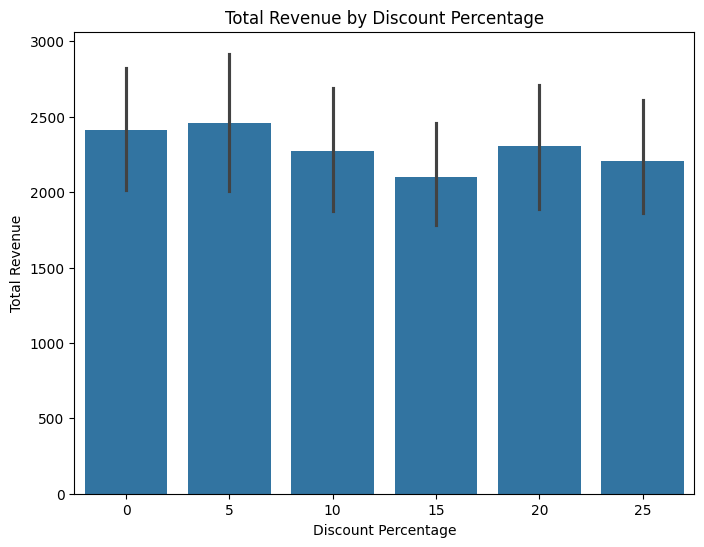

In [ ]:
# Bar plot for total revenue by discount percentage
plt.figure(figsize=(8, 6))
sns.barplot(x='Discount_Applied', y='Revenue', data=df)
plt.title('Total Revenue by Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Total Revenue')
plt.show()

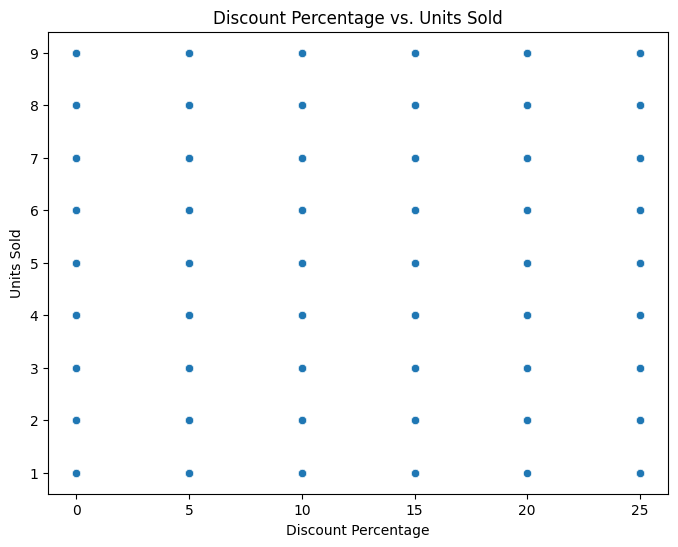

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount_Applied', y='Units_Sold', data=df)
plt.title('Discount Percentage vs. Units Sold')
plt.xlabel('Discount Percentage')
plt.ylabel('Units Sold')
plt.show()

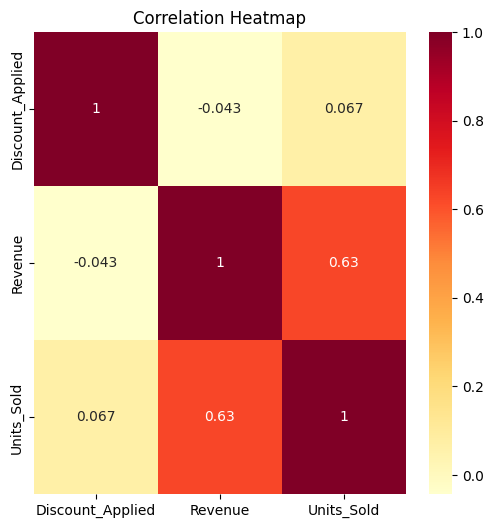

In [35]:
corr_matrix = df[['Discount_Applied', 'Revenue', 'Units_Sold']].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()

Employee Performance and Revenue



In [38]:
employee_revenue = df.groupby("Employee_Name")["Revenue"].sum().sort_values(ascending=False)
print("Total Revenue Generated by Each Employee:\n", employee_revenue[:10])


Total Revenue Generated by Each Employee:
 Employee_Name
Melissa Haynes         8487.00
Andrew Booker          8387.55
Paul Hinton            8019.00
Jessica Yang           7719.30
Brad Coleman           7627.05
Mr. Joseph Jensen      7364.40
William Anderson MD    7336.35
Clifford Lambert       7142.40
Katrina Howell         7113.60
Tony Hart              7030.35
Name: Revenue, dtype: float64


In [37]:
top_3_employee = employee_revenue.head(10)
top_3_employee

,Revenue
Employee_Name,
Melissa Haynes,8487.00
Andrew Booker,8387.55
Paul Hinton,8019.00
Jessica Yang,7719.30
Brad Coleman,7627.05
Mr. Joseph Jensen,7364.40
William Anderson MD,7336.35
Clifford Lambert,7142.40
Katrina Howell,7113.60


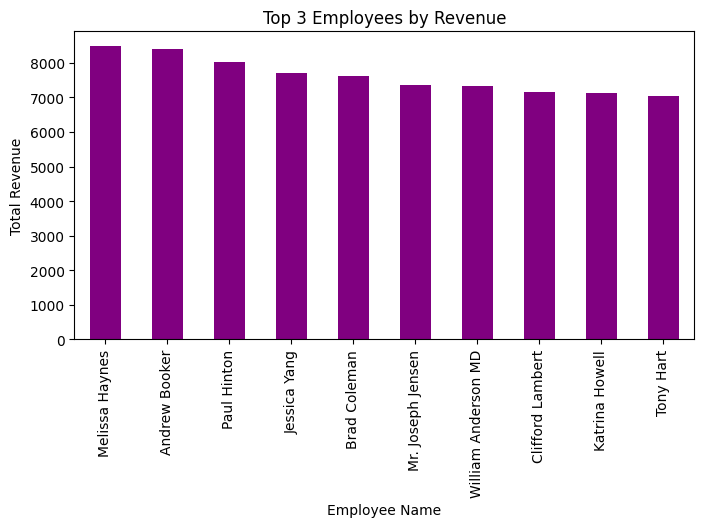

In [40]:
employee_revenue = df.groupby('Employee_Name')['Revenue'].sum().sort_values(ascending=False)
top_employees = employee_revenue.head(10)
top_employees.plot(kind='bar', figsize=(8, 4), color='purple')
plt.title('Top 3 Employees by Revenue')
plt.xlabel('Employee Name')
plt.ylabel('Total Revenue')
plt.show()


In [41]:
avg_performance_per_region = df.groupby("Region")["Employee_Performance_Score"].mean()
print("Average Performance Score per Region:\n", avg_performance_per_region)


Average Performance Score per Region:
 Region
East     4.918033
North    5.081967
South    5.111111
West     5.729730
Name: Employee_Performance_Score, dtype: float64


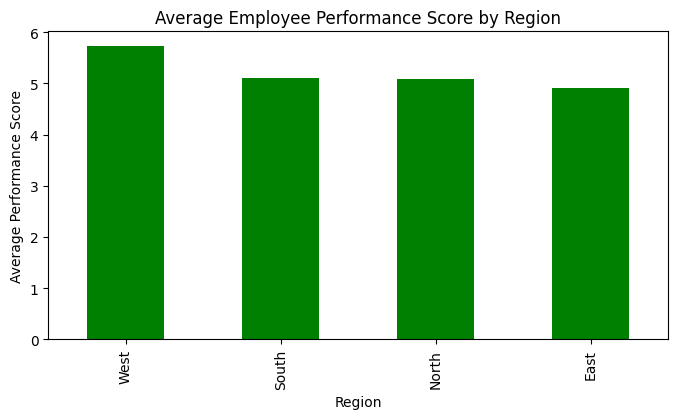

In [43]:
avg_perf_score = df.groupby('Region')['Employee_Performance_Score'].mean().sort_values(ascending=False)
avg_perf_score.plot(kind='bar', figsize=(8, 4), color='green')
plt.title('Average Employee Performance Score by Region')
plt.xlabel('Region')
plt.ylabel('Average Performance Score')
plt.show()


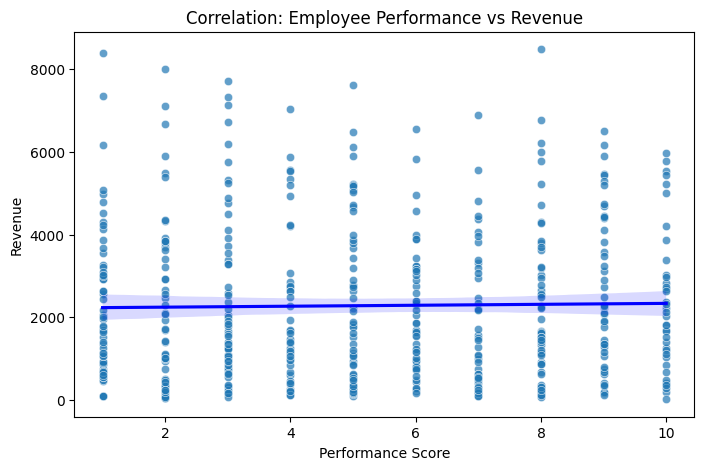

In [44]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Employee_Performance_Score', y='Revenue', alpha=0.7)
sns.regplot(data=df, x='Employee_Performance_Score', y='Revenue', scatter=False, color='blue')
plt.title('Correlation: Employee Performance vs Revenue')
plt.xlabel('Performance Score')
plt.ylabel('Revenue')
plt.show()


In [45]:
performance_revenue_correlation = df["Employee_Performance_Score"].corr(df["Revenue"])
print(f"Correlation Between Employee Performance Scores and Revenue: {performance_revenue_correlation}")


Correlation Between Employee Performance Scores and Revenue: 0.017586089727736134


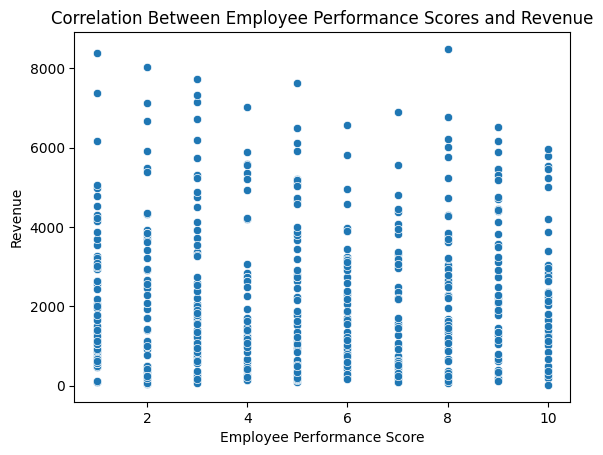

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x="Employee_Performance_Score", y="Revenue")
plt.title("Correlation Between Employee Performance Scores and Revenue")
plt.xlabel("Employee Performance Score")
plt.ylabel("Revenue")
plt.show()


Correlation between Employee Performance and Revenue: 0.02


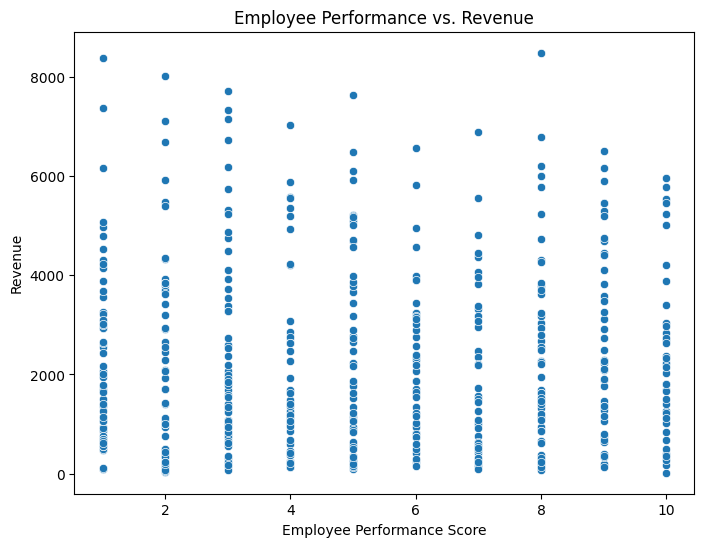

In [ ]:
corr = df['Employee_Performance_Score'].corr(df['Revenue'])
print(f"Correlation between Employee Performance and Revenue: {corr:.2f}")

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Employee_Performance_Score', y='Revenue', data=df)
plt.title('Employee Performance vs. Revenue')
plt.xlabel('Employee Performance Score')
plt.ylabel('Revenue')
plt.show()

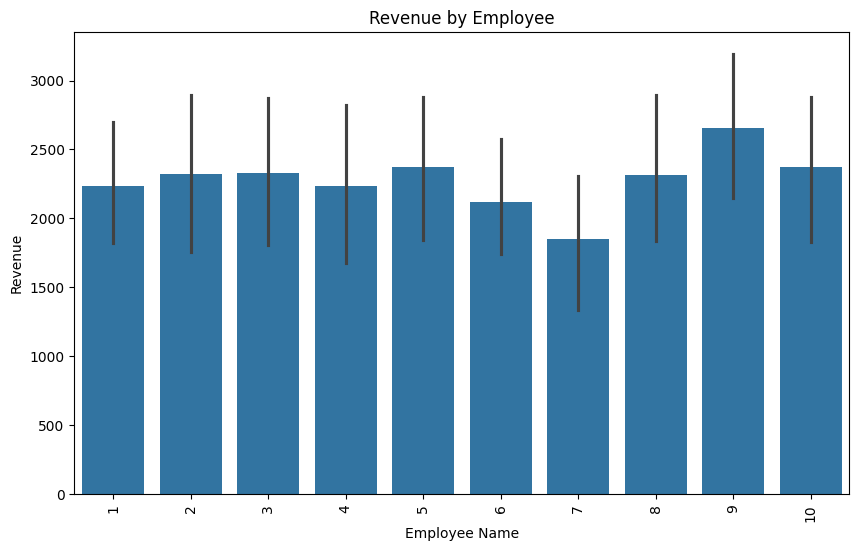

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Employee_Performance_Score', y='Revenue', data=df)
plt.title('Revenue by Employee')
plt.xlabel('Employee Name')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

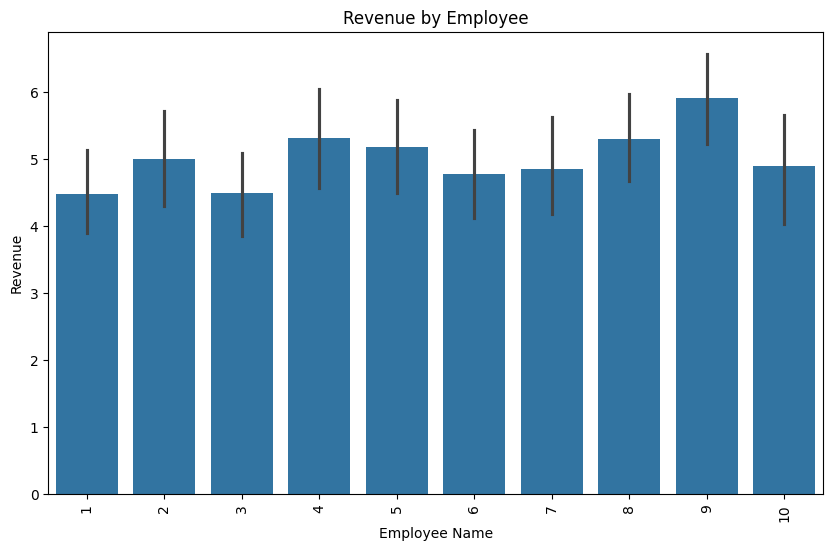

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Employee_Performance_Score', y='Units_Sold', data=df)
plt.title('Revenue by Employee')
plt.xlabel('Employee Name')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

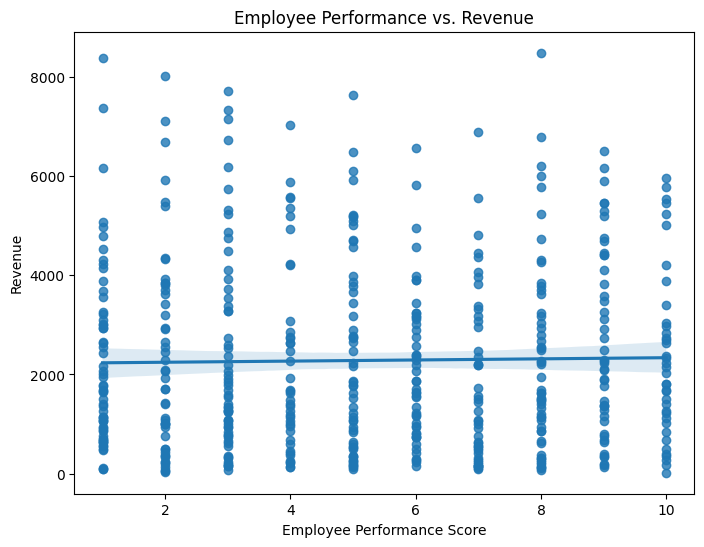

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Employee_Performance_Score', y='Revenue', data=df)
plt.title('Employee Performance vs. Revenue')
plt.xlabel('Employee Performance Score')
plt.ylabel('Revenue')
plt.show()


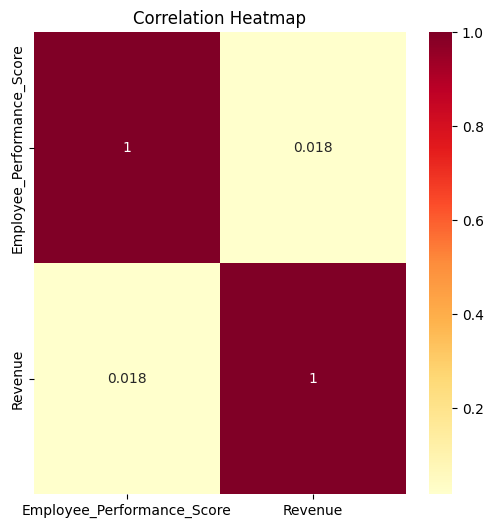

In [ ]:
corr_matrix = df[['Employee_Performance_Score', 'Revenue']].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
corr_matrix = df[['Employee_Performance_Score', 'Revenue', 'Units_Sold']].corr()
print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                            Employee_Performance_Score   Revenue  Units_Sold
Employee_Performance_Score                    1.000000  0.017586    0.096404
Revenue                                       0.017586  1.000000    0.625897
Units_Sold                                    0.096404  0.625897    1.000000


In [ ]:
# Add Net_Revenue column
df["Net_Revenue"] = df.apply(
    lambda row: 0 if row["Return_Status"] == "Yes" else row["Revenue"], axis=1
)

# Add Net_Units_Sold column
df["Net_Units_Sold"] = df.apply(
    lambda row: 0 if row["Return_Status"] == "Yes" else row["Units_Sold"], axis=1
)

print(df)


     Transaction_ID       Date Region  Employee_ID     Employee_Name  \
0                 1 2024-10-09   East          101    Anthony Wilson   
1                 2 2024-06-09   West          103           Anne Ho   
2                 3 2024-04-09  North          118    Katelyn Parker   
3                 4 2024-04-11   East          110      Adam Watkins   
4                 5 2024-11-17   East          103   Rebecca Johnson   
..              ...        ...    ...          ...               ...   
495             496 2024-10-30   East          119    Dana Henderson   
496             497 2024-10-28   East          113       Amanda Lane   
497             498 2024-07-20   West          112  Ronald Hernandez   
498             499 2024-02-12  North          105    Patrick Garcia   
499             500 2024-05-05   West          106    Jonathan Knapp   

    Product_Category Product_Subcategory  Product_Price  Units_Sold  \
0           Clothing         Smartphones            293         

In [ ]:
df.head(15)

,Transaction_ID,Date,Region,Employee_ID,Employee_Name,Product_Category,Product_Subcategory,Product_Price,Units_Sold,Discount_Applied,Employee_Performance_Score,Return_Status,Revenue,Discount_Range,Net_Revenue,Net_Units_Sold
0,1,2024-10-09,East,101,Anthony Wilson,Clothing,Smartphones,293,3,15,6,No,747.15,15-20%,747.15,3
1,2,2024-06-09,West,103,Anne Ho,Clothing,Tables,339,8,25,10,No,2034.00,NaN,2034.00,8
2,3,2024-04-09,North,118,Katelyn Parker,Appliances,Laptops,357,4,20,8,No,1142.40,20-25%,1142.40,4
3,4,2024-04-11,East,110,Adam Watkins,Furniture,Smartphones,385,2,0,3,No,770.00,0-5%,770.00,2
4,5,2024-11-17,East,103,Rebecca Johnson,Appliances,Washing Machines,514,2,0,10,No,1028.00,0-5%,1028.00,2
5,6,2024-09-03,West,108,Jack Brown,Electronics,Smartphones,626,1,25,1,No,469.50,NaN,469.50,1
6,7,2023-12-23,North,114,Dana Jackson,Appliances,Tables,185,4,15,9,Yes,629.00,15-20%,0.00,0
7,8,2024-04-06,North,118,Laura Perez,Electronics,Laptops,563,9,15,1,No,4306.95,15-20%,4306.95,9
8,9,2024-05-04,East,115,Emily Armstrong,Appliances,Sofas,30,7,10,3,No,189.00,10-15%,189.00,7
9,10,2024-12-14,South,102,Barbara Heath,Furniture,Washing Machines,320,7,25,8,No,1680.00,NaN,1680.00,7


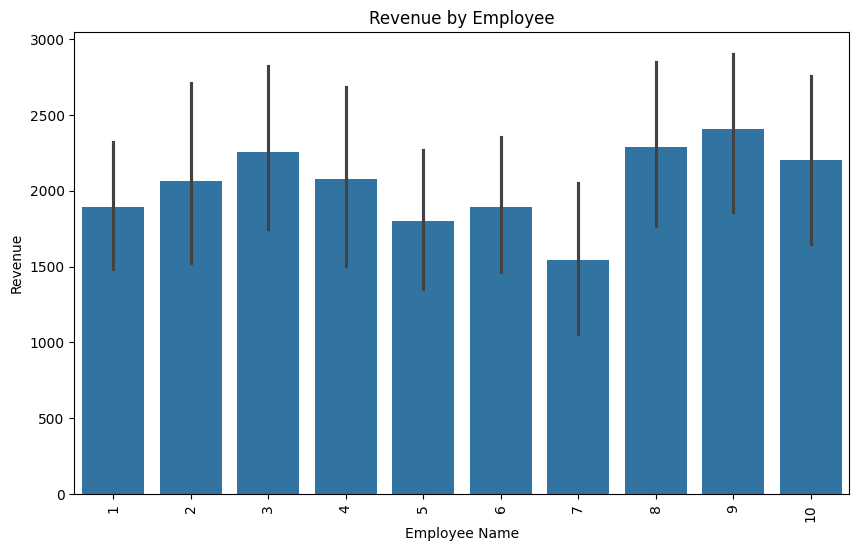

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Employee_Performance_Score', y='Net_Revenue', data=df)
plt.title('Revenue by Employee')
plt.xlabel('Employee Name')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

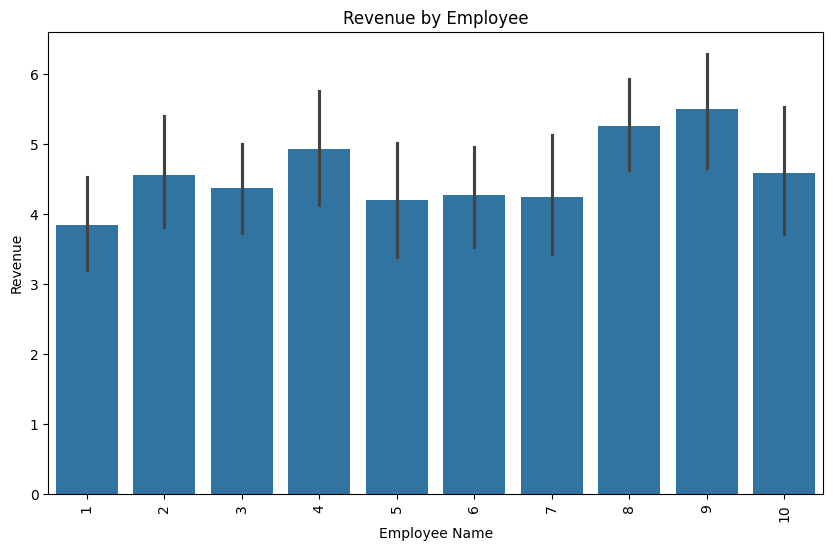

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Employee_Performance_Score', y='Net_Units_Sold', data=df)
plt.title('Revenue by Employee')
plt.xlabel('Employee Name')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

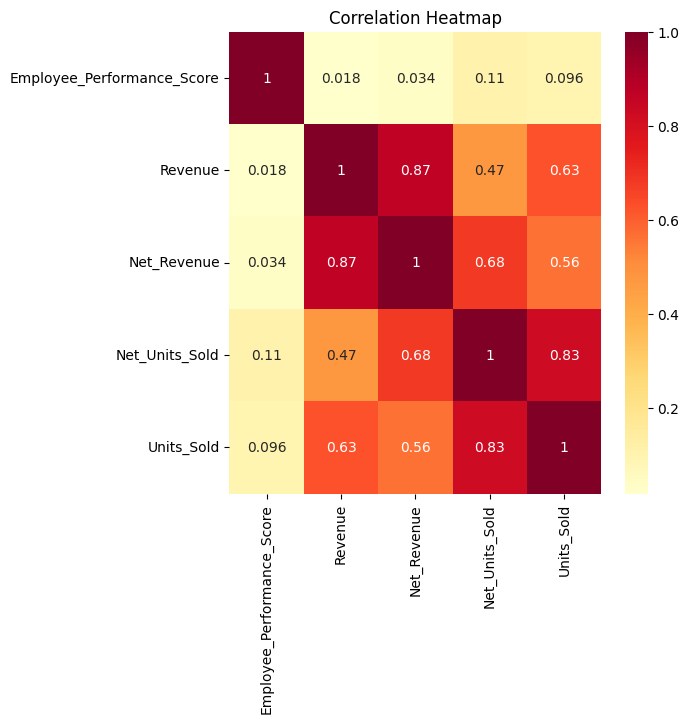

In [ ]:
corr_matrix = df[['Employee_Performance_Score', 'Revenue','Net_Revenue','Net_Units_Sold','Units_Sold']].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
product_sold_per_category = df.groupby('Product_Category')['Units_Sold'].sum()
print("Total Units Sold by Product Category:\n", product_sold_per_category)

Total Units Sold by Product Category:
 Product_Category
Appliances     596
Clothing       629
Electronics    628
Furniture      644
Name: Units_Sold, dtype: int64


In [ ]:
product_revenue_per_category = df.groupby('Product_Category')['Revenue'].sum()
print("Total Revenue Generated by Product Category:\n", product_revenue_per_category)

Total Revenue Generated by Product Category:
 Product_Category
Appliances     265770.70
Clothing       283182.85
Electronics    270567.00
Furniture      321534.95
Name: Revenue, dtype: float64


In [ ]:
product_sold_per_sub_category = df.groupby('Product_Subcategory')['Units_Sold'].sum()
print("Total Units Sold by Product Subcategory:\n", product_sold_per_sub_category)

Total Units Sold by Product Subcategory:
 Product_Subcategory
Laptops             449
Smartphones         391
Sofas               397
T-Shirts            422
Tables              344
Washing Machines    494
Name: Units_Sold, dtype: int64


In [ ]:
product_revenue_per_category = df.groupby('Product_Subcategory')['Revenue'].sum().sort_values(ascending=False)
print("Total Revenue Generated by Product Subcategory:\n", product_revenue_per_category)

Total Revenue Generated by Product Subcategory:
 Product_Subcategory
Washing Machines    220829.45
Laptops             203933.10
T-Shirts            189981.05
Tables              187236.55
Smartphones         176251.50
Sofas               162823.85
Name: Revenue, dtype: float64


In [ ]:
# Total revenue and units sold per product category and subcategory
product_performance = df.groupby(["Product_Category", "Product_Subcategory"])[["Revenue", "Units_Sold"]].sum()
print("Total Revenue and Units Sold for Each Product Category and Subcategory:\n", product_performance)


Total Revenue and Units Sold for Each Product Category and Subcategory:
                                        Revenue  Units_Sold
Product_Category Product_Subcategory                      
Appliances       Laptops              53430.50         132
                 Smartphones          31342.90          63
                 Sofas                34423.70          92
                 T-Shirts             53570.20         115
                 Tables               37007.50          64
                 Washing Machines     55995.90         130
Clothing         Laptops              37421.85          84
                 Smartphones          51535.45         111
                 Sofas                54682.70         127
                 T-Shirts             43826.90         100
                 Tables               51325.30          95
                 Washing Machines     44390.65         112
Electronics      Laptops              46672.25         101
                 Smartphones          3359

In [ ]:
# Add Discount Percentage column
df["Discount_Percentage"] = df["Discount_Applied"] / 100

# Average discount percentage per category
avg_discount_per_category = df.groupby("Product_Category")["Discount_Percentage"].mean()
print("Average Discount Percentage for Each Product Category:\n", avg_discount_per_category)

# Correlation between discount and revenue
discount_revenue_correlation = df["Discount_Percentage"].corr(df["Revenue"])
print(f"Correlation Between Discount Percentage and Revenue: {discount_revenue_correlation}")


Average Discount Percentage for Each Product Category:
 Product_Category
Appliances     0.130172
Clothing       0.121032
Electronics    0.129134
Furniture      0.130916
Name: Discount_Percentage, dtype: float64
Correlation Between Discount Percentage and Revenue: -0.04349561210132096


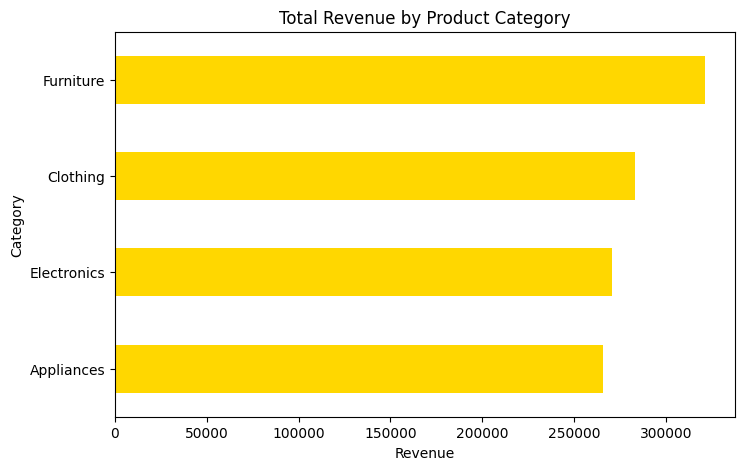

In [49]:
category_revenue = df.groupby('Product_Category')['Revenue'].sum().sort_values()
category_revenue.plot(kind='barh', figsize=(8, 5), color='gold')
plt.title('Total Revenue by Product Category')
plt.xlabel('Revenue')
plt.ylabel('Category')
plt.show()


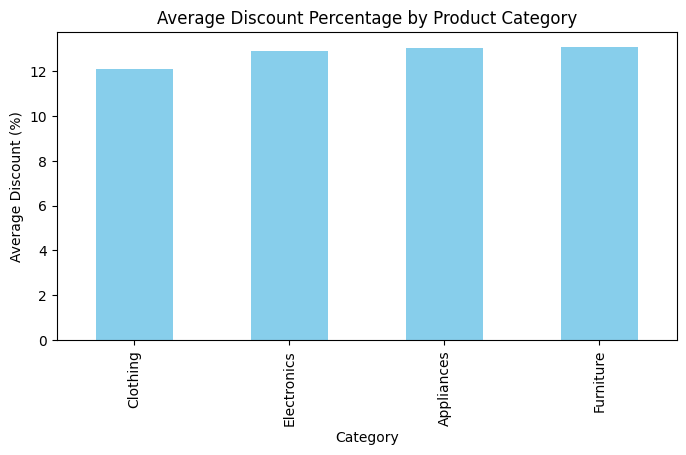

In [50]:
avg_discount = df.groupby('Product_Category')['Discount_Applied'].mean().sort_values()
avg_discount.plot(kind='bar', figsize=(8, 4), color='skyblue')
plt.title('Average Discount Percentage by Product Category')
plt.xlabel('Category')
plt.ylabel('Average Discount (%)')
plt.show()


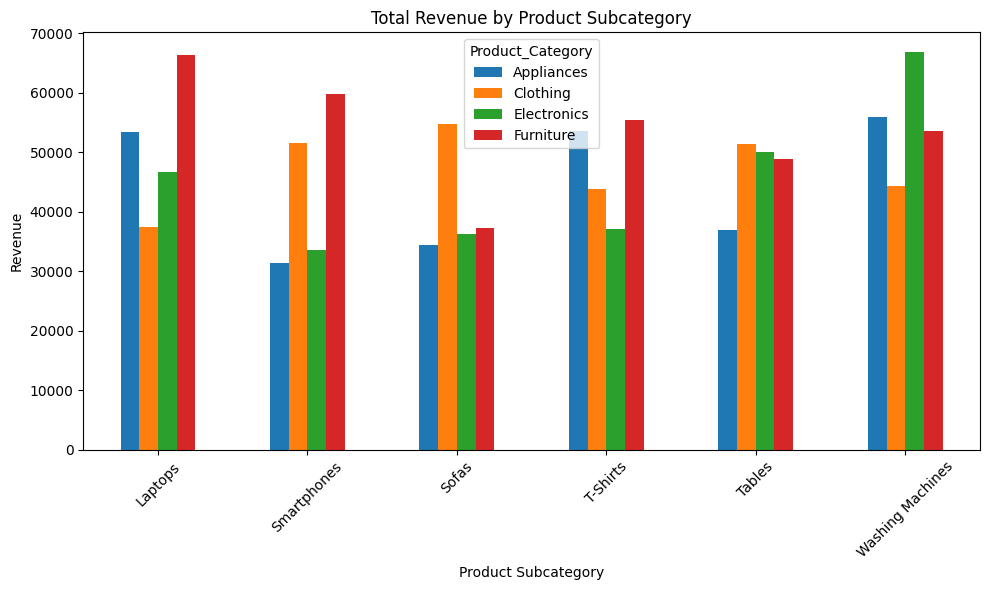

In [ ]:
import seaborn as sns

# Bar plot for revenue by subcategory
product_performance["Revenue"].unstack(level=0).plot(kind="bar", figsize=(10, 6))
plt.title("Total Revenue by Product Subcategory")
plt.xlabel("Product Subcategory")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


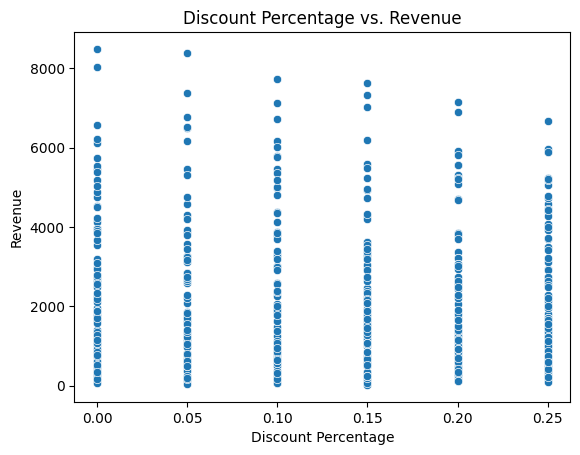

In [ ]:
sns.scatterplot(data=df, x="Discount_Percentage", y="Revenue")
plt.title("Discount Percentage vs. Revenue")
plt.xlabel("Discount Percentage")
plt.ylabel("Revenue")
plt.show()



Average Discount Percentage by Product Category:
Product_Category
Appliances     13.02
Clothing       12.10
Electronics    12.91
Furniture      13.09
Name: Discount_Applied, dtype: float64


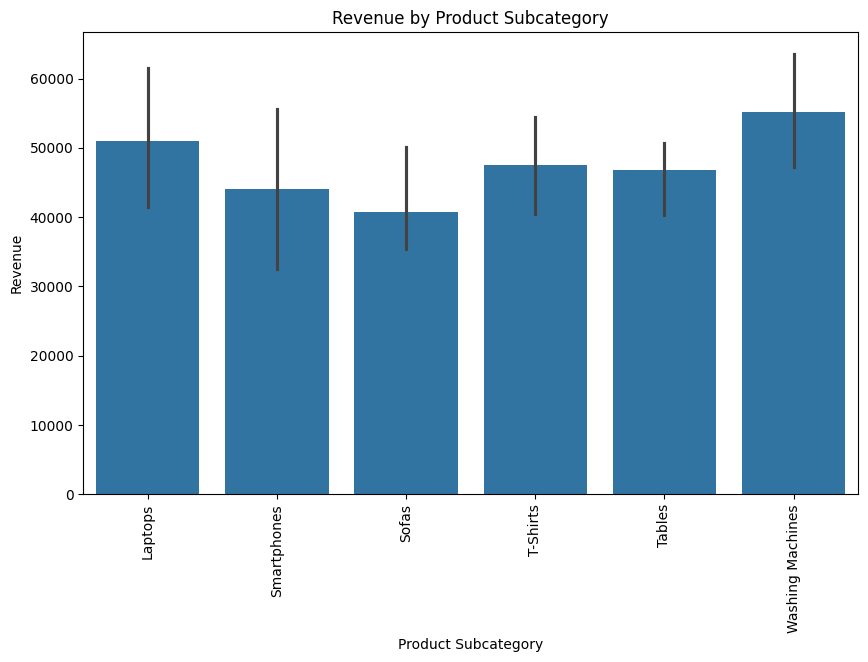

In [ ]:
discount_by_category = df.groupby('Product_Category')['Discount_Applied'].mean().round(2)
print("\nAverage Discount Percentage by Product Category:")
print(discount_by_category)

# Visualize product performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Subcategory', y='Revenue', data=product_performance)
plt.title('Revenue by Product Subcategory')
plt.xlabel('Product Subcategory')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

Return Analysis


In [ ]:
# Return rate calculation for each region
returns_by_region = df.groupby("Region")["Return_Status"].apply(lambda x: (x == "Yes").mean() * 100)
print("Return Rate (Percentage of Returned Transactions) for Each Region:\n", returns_by_region)


Return Rate (Percentage of Returned Transactions) for Each Region:
 Region
East      5.737705
North     8.196721
South    12.037037
West     10.810811
Name: Return_Status, dtype: float64


In [ ]:
# Return rate calculation for each product category
returns_by_category = df.groupby("Product_Category")["Return_Status"].apply(lambda x: (x == "Yes").mean() * 100)
print("Return Rates for Each Product Category:\n", returns_by_category)

# Identify the category with the highest return rate
highest_return_category = returns_by_category.idxmax()
highest_return_rate = returns_by_category.max()
print(f"Product Category with the Highest Return Rate: {highest_return_category} ({highest_return_rate:.2f}%)")


Return Rates for Each Product Category:
 Product_Category
Appliances     10.344828
Clothing        8.730159
Electronics     7.874016
Furniture       9.923664
Name: Return_Status, dtype: float64
Product Category with the Highest Return Rate: Appliances (10.34%)


In [ ]:
# Clean the dataset if duplicates exist
df = df.drop_duplicates()

# Add Discount Percentage column if not already present
df["Discount_Percentage"] = df["Discount_Applied"] / 100

# Calculate return rate for different discount percentage ranges
discount_bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]  # Define discount ranges
df["Discount_Range"] = pd.cut(df["Discount_Percentage"], bins=discount_bins, labels=["0-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50-100%"])

# Calculate return rate for each discount range
returns_by_discount = df.groupby("Discount_Range")["Return_Status"].apply(lambda x: (x == "Yes").mean() * 100)

print("Return Rates by Discount Percentage Range:\n", returns_by_discount)


Return Rates by Discount Percentage Range:
 Discount_Range
0-10%      11.258278
10-20%     11.627907
20-30%      4.395604
30-40%           NaN
40-50%           NaN
50-100%          NaN
Name: Return_Status, dtype: float64


<ipython-input-49-f641e30a1058>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  returns_by_discount = df.groupby("Discount_Range")["Return_Status"].apply(lambda x: (x == "Yes").mean() * 100)


In [ ]:
# C. Discount Impact on Returns
discount_return = df.groupby('Discount_Applied')['Return_Status'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Returns')
discount_total = df.groupby('Discount_Applied').size().reset_index(name='Total')
discount_return_rates = pd.merge(discount_return, discount_total, on='Discount_Applied')
discount_return_rates['Return_Rate'] = (discount_return_rates['Returns'] / discount_return_rates['Total']) * 100


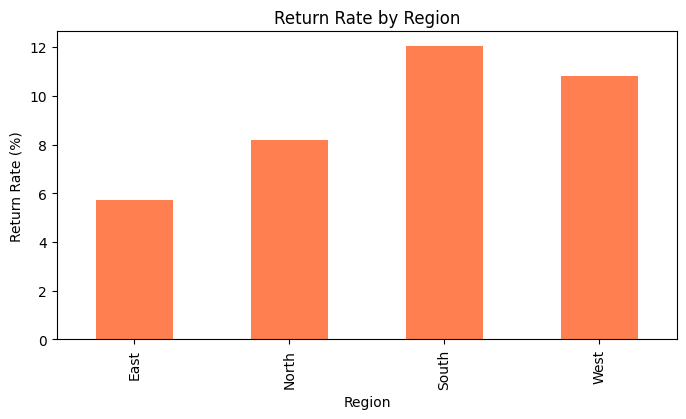

In [51]:
df['Return_Flag'] = df['Return_Status'].apply(lambda x: 1 if x == 'Yes' else 0)
return_rate_region = df.groupby('Region')['Return_Flag'].mean() * 100
return_rate_region.plot(kind='bar', figsize=(8, 4), color='coral')
plt.title('Return Rate by Region')
plt.xlabel('Region')
plt.ylabel('Return Rate (%)')
plt.show()


In [ ]:
discount_return_rates


,Discount_Applied,Returns,Total,Return_Rate
0,0,5,86,5.813953
1,5,10,69,14.492754
2,10,7,82,8.536585
3,15,13,98,13.265306
4,20,7,74,9.459459
5,25,4,91,4.395604


<ipython-input-50-9ecb8b1afbf9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=returns_by_discount.index, y=returns_by_discount.values, palette="viridis")


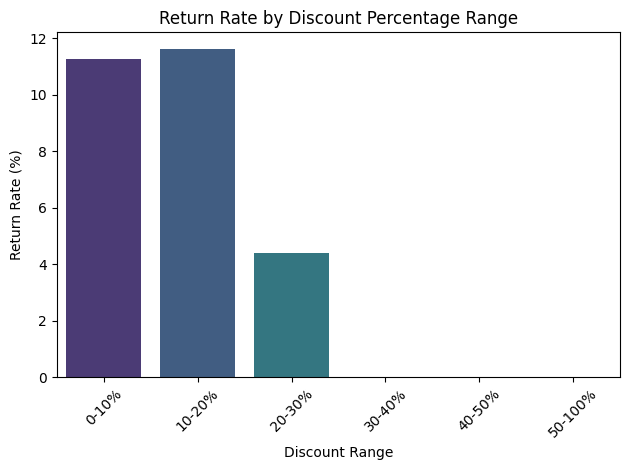

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot return rates by discount range
sns.barplot(x=returns_by_discount.index, y=returns_by_discount.values, palette="viridis")
plt.title("Return Rate by Discount Percentage Range")
plt.xlabel("Discount Range")
plt.ylabel("Return Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Time Series Analysis

In [ ]:
# Ensure Date is in datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Calculate total daily revenue
daily_revenue = df.groupby("Date")["Revenue"].sum()

print("Total Daily Revenue:\n", daily_revenue.head())


Total Daily Revenue:
 Date
2023-12-23    1406.00
2023-12-24     318.00
2023-12-25    8485.80
2023-12-26    4956.35
2023-12-27    9367.95
Name: Revenue, dtype: float64


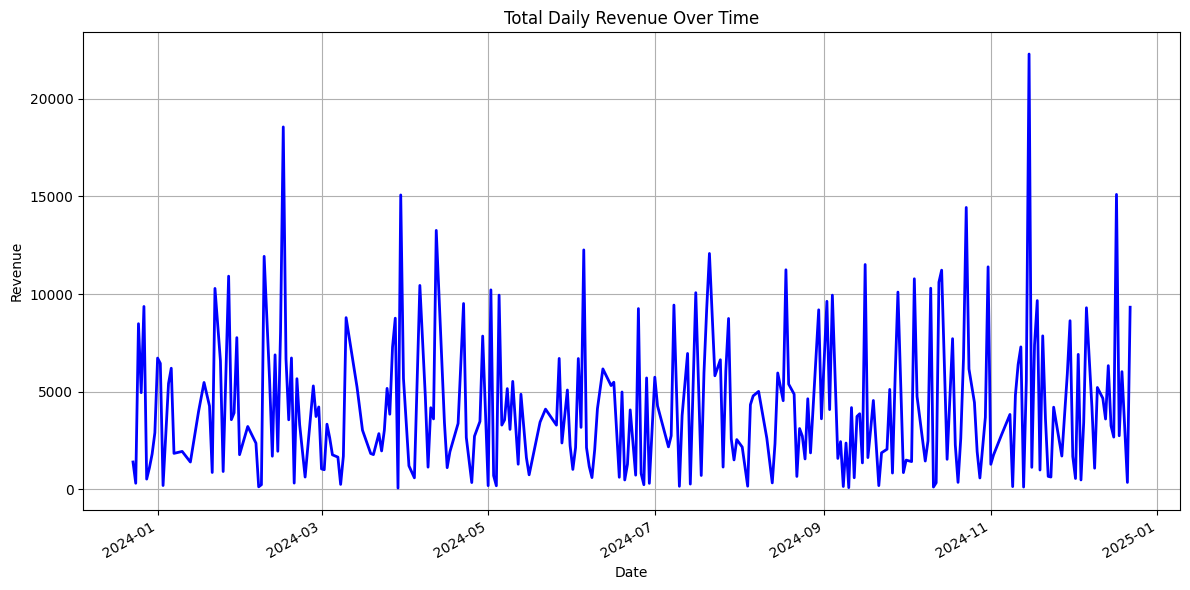

In [ ]:
import matplotlib.pyplot as plt

# Plot the total daily revenue
plt.figure(figsize=(12, 6))
daily_revenue.plot(kind="line", color="blue", linewidth=2)
plt.title("Total Daily Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


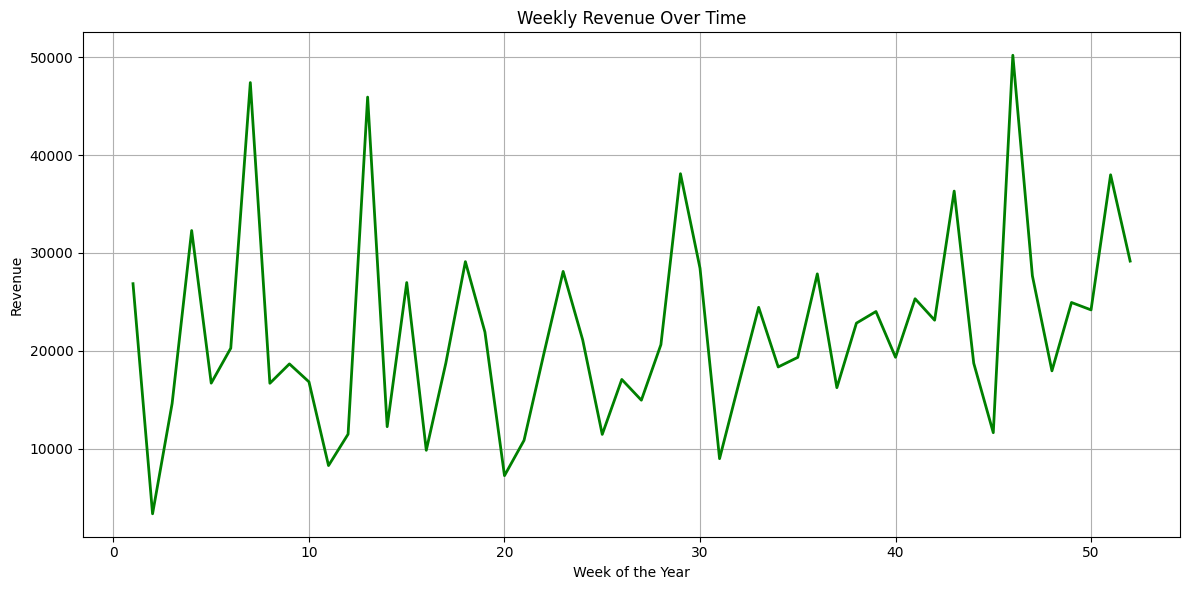

In [ ]:
# Add a 'Week_of_Year' column
df["Week_of_Year"] = df["Date"].dt.isocalendar().week

# Calculate total revenue by week
weekly_revenue = df.groupby("Week_of_Year")["Revenue"].sum()

# Plot weekly revenue
plt.figure(figsize=(12, 6))
weekly_revenue.plot(kind="line", color="green", linewidth=2)
plt.title("Weekly Revenue Over Time")
plt.xlabel("Week of the Year")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


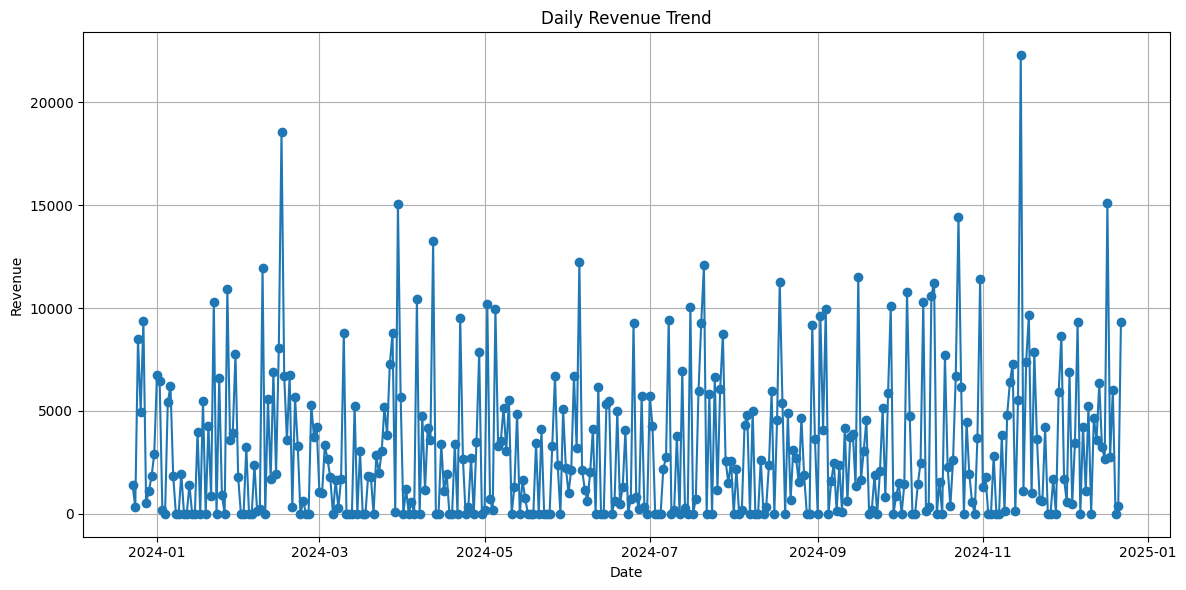

In [ ]:
# 5. Time-Series Analysis
# A. Daily Revenue
daily_revenue = df.resample('D', on='Date').Revenue.sum()

plt.figure(figsize=(12,6))
plt.plot(daily_revenue.index, daily_revenue.values, marker='o')
plt.title('Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid()
plt.tight_layout()
plt.show()

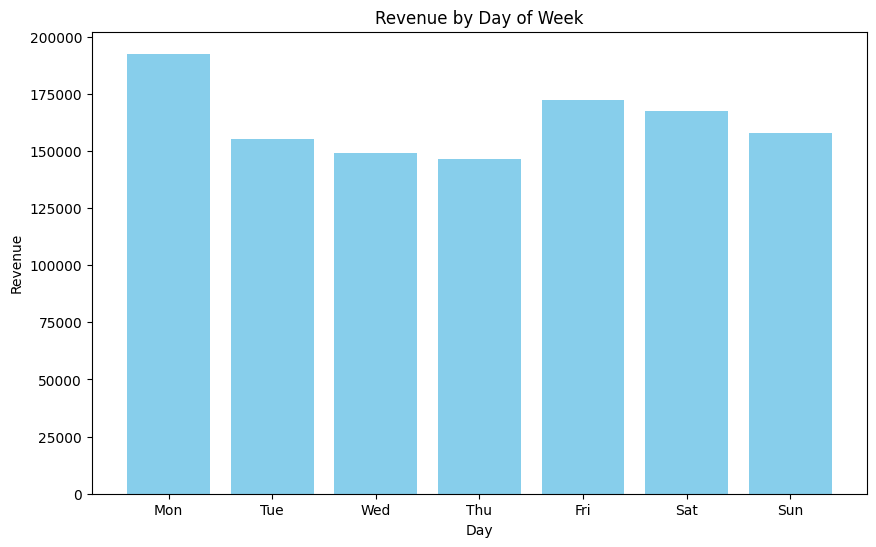

In [ ]:
# B. Highest Revenue Day of Week
df['Day_of_Week'] = df['Date'].dt.dayofweek
revenue_per_day = df.groupby('Day_of_Week').Revenue.sum().reset_index()
revenue_per_day['Weekday'] = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10,6))
plt.bar(revenue_per_day['Weekday'], revenue_per_day['Revenue'], color='skyblue')
plt.title('Revenue by Day of Week')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.show()

<ipython-input-58-8124ef6f8010>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rev = df.resample('M', on='Date').Revenue.sum()


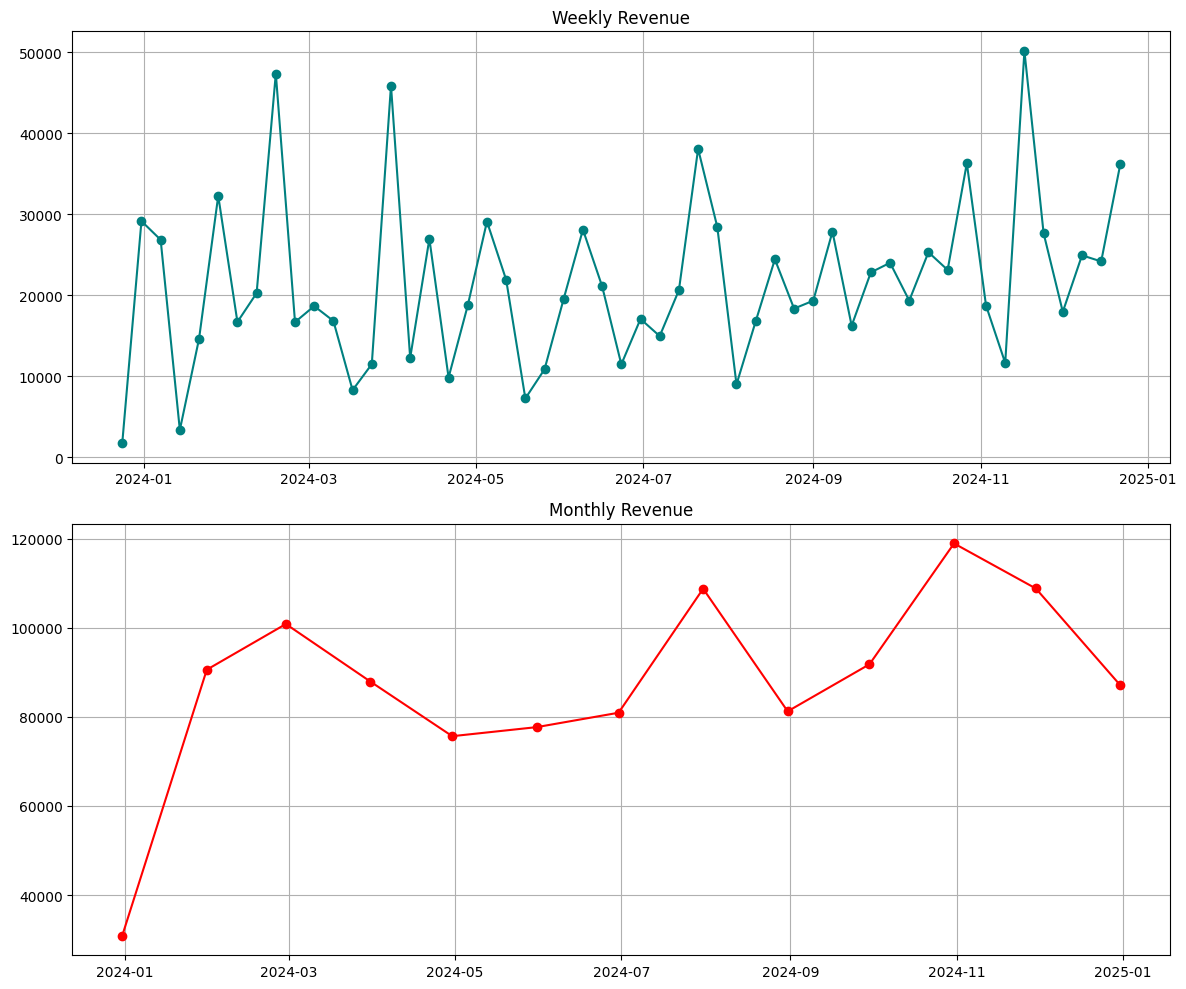

In [ ]:
# C. Weekly and Monthly Revenue
weekly_rev = df.resample('W', on='Date').Revenue.sum()
monthly_rev = df.resample('M', on='Date').Revenue.sum()

fig, axes = plt.subplots(2, 1, figsize=(12,10))
axes[0].plot(weekly_rev.index, weekly_rev.values, marker='o', label='Weekly', color='teal')
axes[0].set_title('Weekly Revenue')
axes[0].grid()

axes[1].plot(monthly_rev.index, monthly_rev.values, marker='o', label='Monthly', color='red')
axes[1].set_title('Monthly Revenue')
axes[1].grid()
plt.tight_layout()
plt.show()

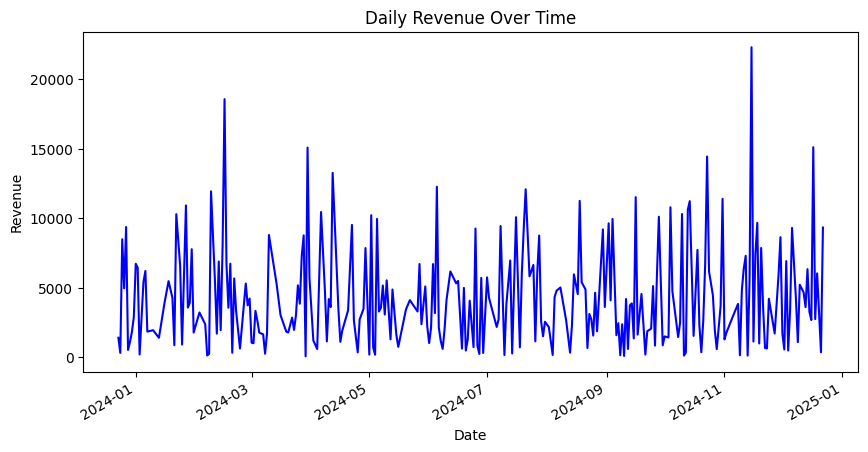

In [52]:
df['Date'] = pd.to_datetime(df['Date'])
daily_revenue = df.groupby('Date')['Revenue'].sum()
daily_revenue.plot(kind='line', figsize=(10, 5), color='blue')
plt.title('Daily Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()


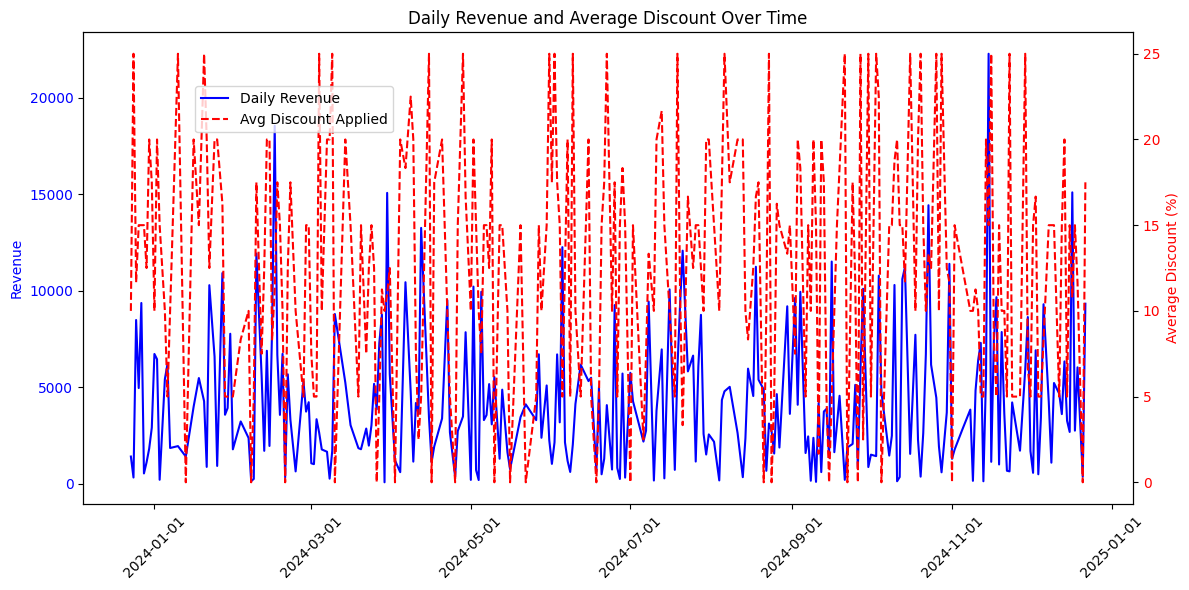

In [53]:
import matplotlib.dates as mdates

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by date to calculate daily revenue and average discount
daily_metrics = df.groupby('Date').agg({'Revenue': 'sum', 'Discount_Applied': 'mean'})

# Plot with dual axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Revenue on the primary y-axis
ax1.plot(daily_metrics.index, daily_metrics['Revenue'], color='blue', label='Daily Revenue')
ax1.set_ylabel('Revenue', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Daily Revenue and Average Discount Over Time')

# Format the x-axis for better readability
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Plot Discount Applied on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(daily_metrics.index, daily_metrics['Discount_Applied'], color='red', linestyle='--', label='Avg Discount Applied')
ax2.set_ylabel('Average Discount (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a legend
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()


<ipython-input-54-2600b788f775>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_metrics = df.resample('M', on='Date').agg({'Revenue': 'sum', 'Discount_Applied': 'mean'})


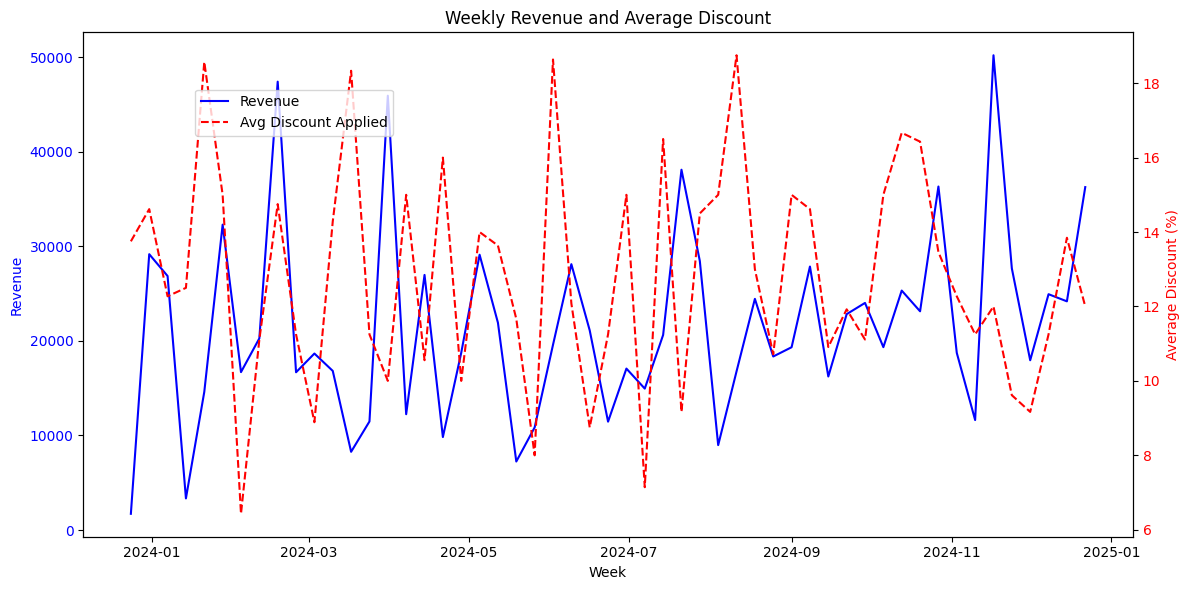

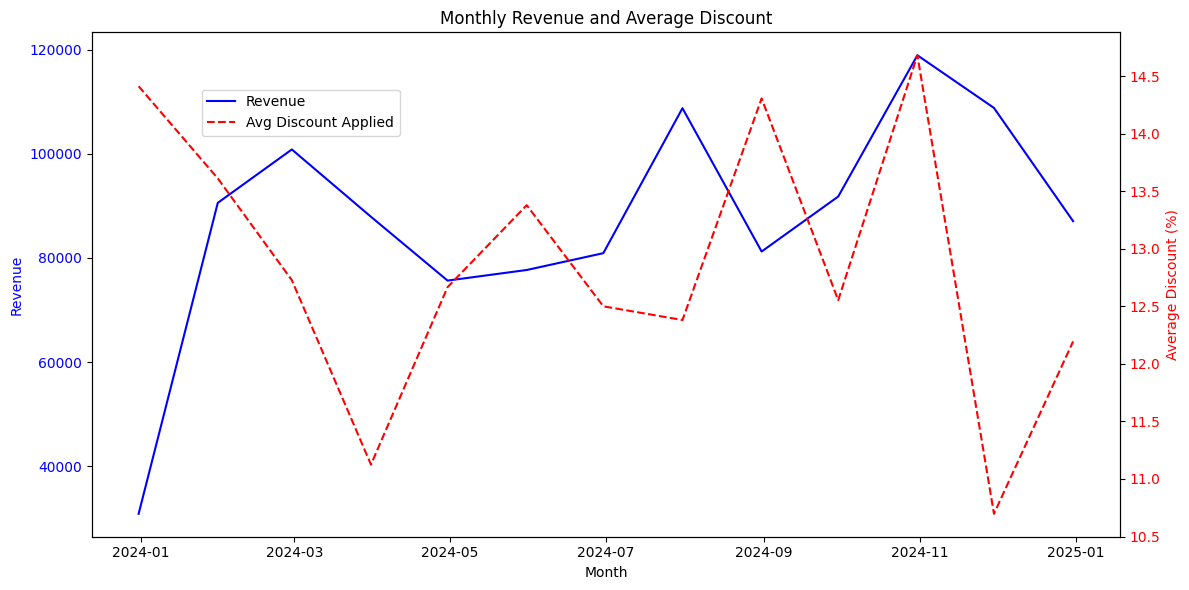

In [54]:
# Group by week and month to calculate aggregated metrics
weekly_metrics = df.resample('W', on='Date').agg({'Revenue': 'sum', 'Discount_Applied': 'mean'})
monthly_metrics = df.resample('M', on='Date').agg({'Revenue': 'sum', 'Discount_Applied': 'mean'})

# Function to plot metrics
def plot_time_series(metrics, title, xlabel):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot Revenue on the primary y-axis
    ax1.plot(metrics.index, metrics['Revenue'], color='blue', label='Revenue')
    ax1.set_ylabel('Revenue', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title(title)

    # Plot Discount Applied on the secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(metrics.index, metrics['Discount_Applied'], color='red', linestyle='--', label='Avg Discount Applied')
    ax2.set_ylabel('Average Discount (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Add a legend
    fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)
    ax1.set_xlabel(xlabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot weekly metrics
plot_time_series(weekly_metrics, 'Weekly Revenue and Average Discount', 'Week')

# Plot monthly metrics
plot_time_series(monthly_metrics, 'Monthly Revenue and Average Discount', 'Month')
